## 可视化分割预测结果

目标
1. Blood>0.4
2. Muscle>0.5
3. Spongy Bone>0.5
4. CSF>0.73
5. Cortical Bone>0.7
6. Gray matter>0.83
7. Skin(Scalp)>0.8
8. White matter>0.9
9. Eye Balls>0.9
10. Bone>0.7

### 模型预测结果

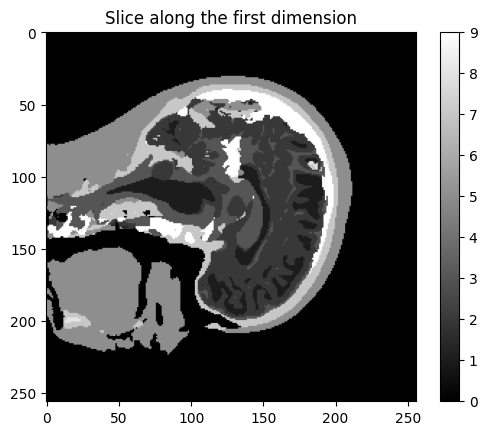

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load the array from the .npy file
array = np.load('/tmp/code/brain_seg/p00/segmentation_result/GZHU004.npy_0_4444_0_0.0001_10_0418_14:58:56.pth.npy')

# Choose a slice to visualize (for example, the middle slice along the first dimension)
slice_index = array.shape[0] // 2

#print(array.shape[0])
#print(slice_index)

#slice_index = 20

# Plot the slice
plt.imshow(array[slice_index, :, :], cmap='gray')
plt.colorbar()
plt.title('Slice along the first dimension')
plt.show()


### 原始数据&原始标签&分割结果

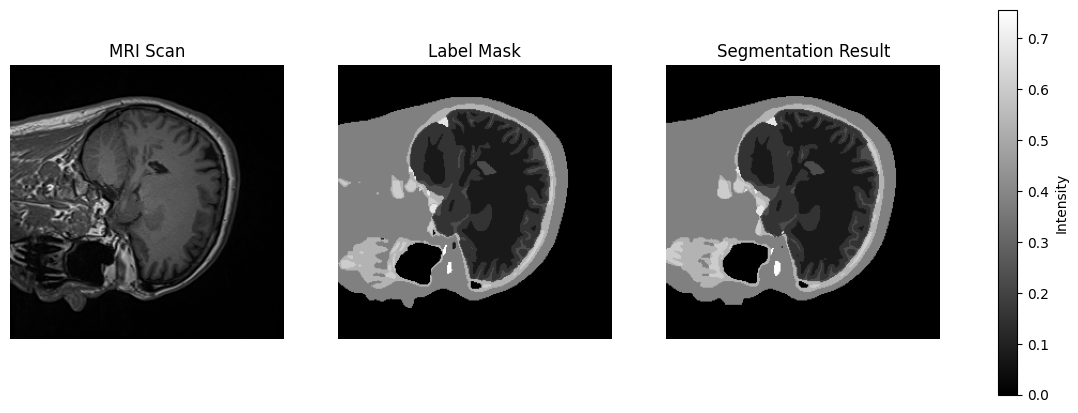

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Load the array from the .npy file
array0 = np.load('/tmp/code/brain_seg/data00/test/0010/QJGZ029.npy')
array1 = np.load('/tmp/code/brain_seg/p00/segmentation_result/QJGZ029.npy_0_4444_0_0.0001_10_0427_16:39:07.pth.npy')

# Choose a slice to visualize (for example, the middle slice along the first dimension)
slice_index = array0.shape[1] // 2
slice_index = 110

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the slices
im0 = axs[0].imshow(array0[0, slice_index, :, :], cmap='gray')
axs[0].set_title('MRI Scan')
axs[0].axis('off')  # Turn off axis for cleaner visualization

im1 = axs[1].imshow(array0[1, slice_index, :, :], cmap='gray')
axs[1].set_title('Label Mask')
axs[1].axis('off')

im2 = axs[2].imshow(array1[slice_index, :, :], cmap='gray')
axs[2].set_title('Segmentation Result')
axs[2].axis('off')

# Create a colorbar using a dummy image
cbar = fig.colorbar(im0, ax=axs, orientation='vertical')
cbar.set_label('Intensity')

plt.show()



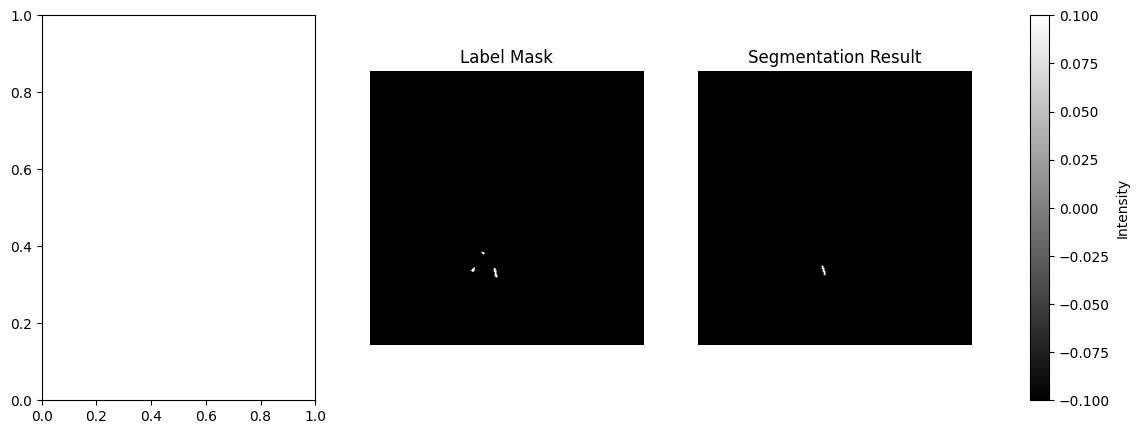

In [14]:
# Now array0 and array1 contain only values equal to 10
import numpy as np
import matplotlib.pyplot as plt

# Load the array from the .npy file
array0 = np.load('/tmp/code/brain_seg/data00/test/00/QJSH031.npy')
array1 = np.load('/tmp/code/brain_seg/p00/segmentation_result/QJSH031.npy_0_4444_0_0.0001_10_0418_18:22:39.pth.npy')

# Set all non-10 values in array0 to 0
array0[array0 != 10] = 0

# Set all non-10 values in array1 to 0
array1[array1 != 10] = 0

# Choose a slice to visualize (for example, the middle slice along the first dimension)
slice_index = array0.shape[1] // 2
slice_index = 70
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the slices
#im0 = axs[0].imshow(array0[0, slice_index, :, :], cmap='gray')
#axs[0].set_title('MRI Scan')
#axs[0].axis('off')  # Turn off axis for cleaner visualization

im1 = axs[1].imshow(array0[1, slice_index, :, :], cmap='gray')
axs[1].set_title('Label Mask')
axs[1].axis('off')

im2 = axs[2].imshow(array1[slice_index, :, :], cmap='gray')
axs[2].set_title('Segmentation Result')
axs[2].axis('off')

# Create a colorbar using a dummy image
cbar = fig.colorbar(im0, ax=axs, orientation='vertical')
cbar.set_label('Intensity')

plt.show()


### 统计像素值直方图

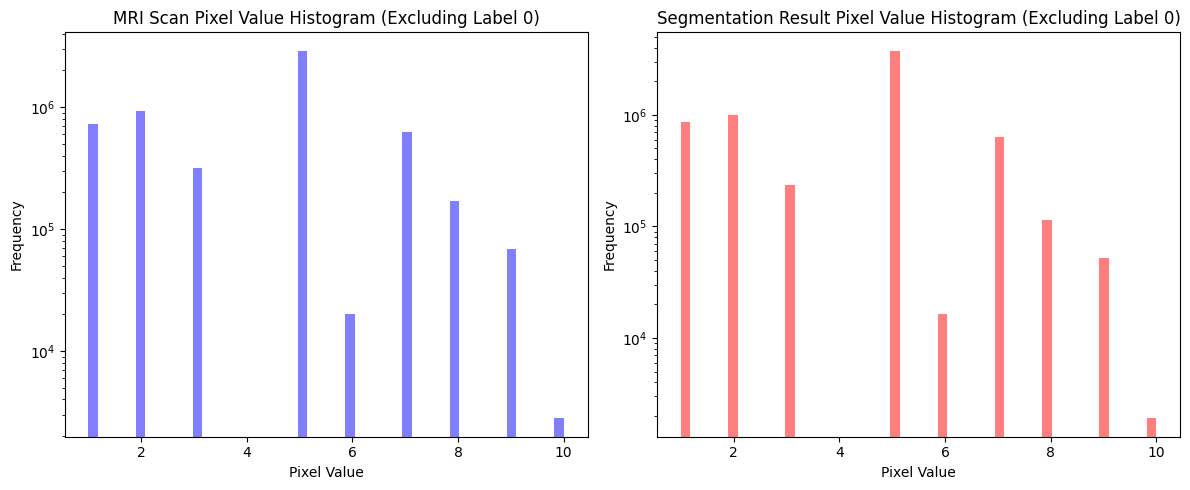

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Load the arrays from the .npy files
array0 = np.load('/tmp/code/brain_seg/data00/test/00/QJSH032.npy')
array1 = np.load('/tmp/code/brain_seg/p00/segmentation_result/QJSH034.npy_0_4444_0_0.0001_10_0417_14:51:22.pth.npy')

# Filter out label 0 pixels
mask0 = array0[1] != 0
mask1 = array1 != 0
filtered_array0 = array0[1][mask0].flatten()
filtered_array1 = array1[mask1].flatten()

# Plot histograms of pixel values
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram of MRI scan
axs[0].hist(filtered_array0, bins=50, color='blue', alpha=0.5)
axs[0].set_title('MRI Scan Pixel Value Histogram (Excluding Label 0)')
axs[0].set_xlabel('Pixel Value')
axs[0].set_ylabel('Frequency')
axs[0].set_yscale('log')  # Set y-axis to log scale

# Plot histogram of segmentation result
axs[1].hist(filtered_array1, bins=50, color='red', alpha=0.5)
axs[1].set_title('Segmentation Result Pixel Value Histogram (Excluding Label 0)')
axs[1].set_xlabel('Pixel Value')
axs[1].set_ylabel('Frequency')
axs[1].set_yscale('log')  # Set y-axis to log scale

plt.tight_layout()
plt.show()

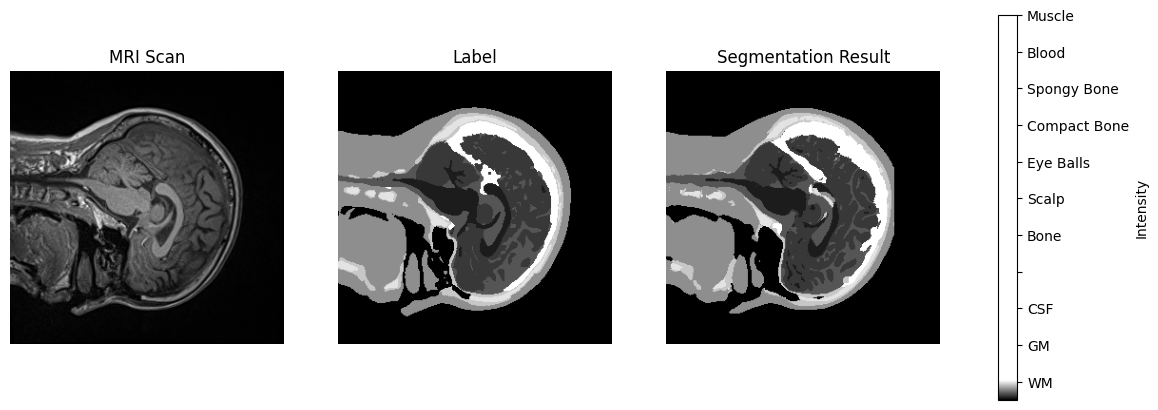

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load the arrays from the .npy files
array0 = np.load('/tmp/code/brain_seg/data00/test/00/QJSH031.npy')
array1 = np.load('/tmp/code/brain_seg/p00/segmentation_result/QJSH031.npy_0_4444_0_0.0001_10_0418_14:58:56.pth.npy')

# Define label list
label_list = ['WM', 'GM', 'CSF', None, 'Bone', 'Scalp', 'Eye Balls', 'Compact Bone', 'Spongy Bone', 'Blood', 'Muscle']

# Choose a slice to visualize (for example, the middle slice along the first dimension)
slice_index = array0.shape[1] // 2


# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the slices
im0 = axs[0].imshow(array0[0, slice_index, :, :], cmap='gray')
axs[0].set_title('MRI Scan')
axs[0].axis('off')  # Turn off axis for cleaner visualization

im1 = axs[1].imshow(array0[1, slice_index, :, :], cmap='gray')
axs[1].set_title('Label')
axs[1].axis('off')

im2 = axs[2].imshow(array1[slice_index, :, :], cmap='gray')
axs[2].set_title('Segmentation Result')
axs[2].axis('off')

# Create a colorbar using a dummy image
cbar = fig.colorbar(im0, ax=axs, orientation='vertical')
cbar.set_label('Intensity')

# Add legend for segmentation result
cbar.ax.get_yaxis().set_ticks(np.arange(len(label_list)) + 0.5)
cbar.ax.set_yticklabels(label_list)

plt.show()


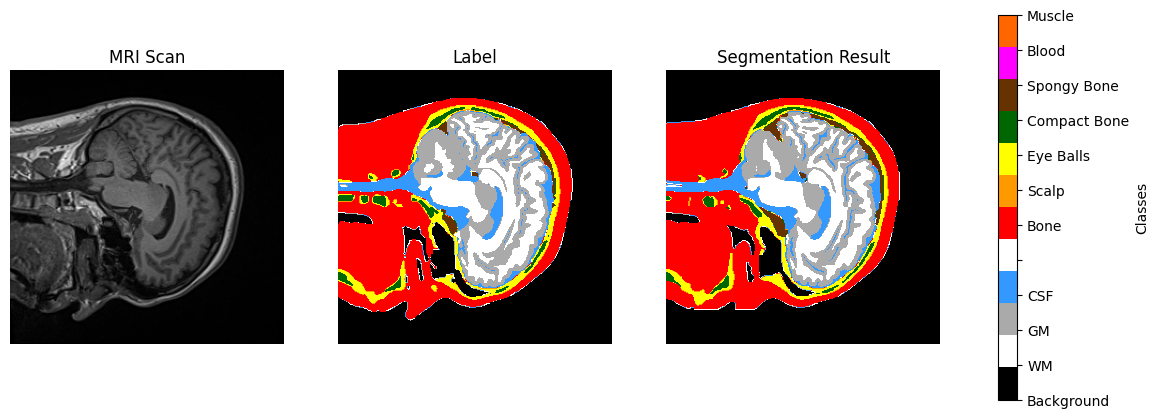

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

# Load the arrays from the .npy files
array0 = np.load('/tmp/code/brain_seg/data00/test/0010/QJGZ029.npy')
array1 = np.load('/tmp/code/brain_seg/p00/segmentation_result/QJGZ029.npy_0_4444_0_0.0001_10_0427_15:51:58.pth.npy')

# Define label list
label_list = ['Background', 'WM', 'GM', 'CSF', None, 'Bone', 'Scalp', 'Eye Balls', 'Compact Bone', 'Spongy Bone', 'Blood', 'Muscle']

# Define colors for each label
label_colors = ['#000000',  # Background
                '#FFFFFF',  # WM (White Matter)
                '#AAAAAA',  # GM (Gray Matter)
                '#3399FF',  # CSF (Cerebrospinal Fluid)
                '#FFFFFF',  # None (Transparent)
                '#FF0000',  # Bone
                '#FF9900',  # Scalp
                '#FFFF00',  # Eye Balls
                '#006600',  # Compact Bone
                '#663300',  # Spongy Bone
                '#FF00FF',  # Blood
                '#FF6600']  # Muscle

# Choose a slice to visualize (for example, the middle slice along the first dimension)
slice_index = array0.shape[1] // 2
slice_index = 80

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the slices
im0 = axs[0].imshow(array0[0, slice_index, :, :], cmap='gray')
axs[0].set_title('MRI Scan')
axs[0].axis('off')  # Turn off axis for cleaner visualization

im1 = axs[1].imshow(array0[1, slice_index, :, :], cmap=cmap, vmin=0, vmax=len(label_list)-1)
axs[1].set_title('Label')
axs[1].axis('off')

# Create a custom colormap for segmentation result
cmap = matplotlib.colors.ListedColormap(label_colors)

im2 = axs[2].imshow(array1[slice_index, :, :], cmap=cmap, vmin=0, vmax=len(label_list)-1)
axs[2].set_title('Segmentation Result')
axs[2].axis('off')

# Add legend for segmentation result
cbar = fig.colorbar(im2, ax=axs, orientation='vertical', ticks=np.arange(len(label_list)))
cbar.set_label('Classes')
cbar.ax.set_yticklabels(label_list)

plt.show()


In [2]:
import numpy as np

# Load the array from the .npy file
array0 = np.load('/tmp/code/brain_seg/data00/test/00/QJGZ030.npy')
array0[array0 != 10] = 0

# Get the minimum and maximum values in the array
min_value = np.min(array0)
max_value = np.max(array0)

print("Minimum value in the array:", min_value)
print("Maximum value in the array:", max_value)


Minimum value in the array: 0.0
Maximum value in the array: 10.0


In [ ]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# 文件夹路径
data_folder = '/tmp/code/brain_seg/data00/train/raw/'

# 初始化存储所有像素值的数组
all_pixel_values = []

# 获取所有字文件夹的路径
subject_folders = [os.path.join(data_folder, folder) for folder in os.listdir(data_folder) if os.path.isdir(os.path.join(data_folder, folder))]

# 计算每个图像的像素值分布情况
for subject_folder in subject_folders:
    file_path = os.path.join(subject_folder, 'final_tissues.nii.gz')
    if os.path.exists(file_path):
        # 加载.nii.gz文件
        img = nib.load(file_path)
        # 获取像素值数组
        data = img.get_fdata()
        # 将三维数组展平并添加到all_pixel_values中
        all_pixel_values.extend(data.flatten())

# 将像素值转换为NumPy数组
all_pixel_values = np.array(all_pixel_values)

# 绘制像素值的直方图
plt.figure(figsize=(8, 6))
plt.hist(all_pixel_values, bins=50, color='green', alpha=0.7)
plt.title('Histogram of Pixel Values in Training Dataset')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.yscale('log')  # 设置y轴为对数刻度
plt.grid(True, which="both", ls="--")
plt.show()


### 可视化DICE CO

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 指定.npy文件的路径
#result_file = file_record = f'/tmp/code/brain_seg/p00/dice/prediction_record_kdw.npy'
#result_file = file_record = f'/tmp/code/brain_seg/p00/dice/prediction_record4_28.npy'
#result_file = file_record = f'/tmp/code/brain_seg/p00/dice/prediction_record.npy'
#result_file = file_record = f'/tmp/code/brain_seg/10_labels/L10_Muscle/result/prediction_record.npy'
# 加载.npy文件

result_data = np.load(result_file, allow_pickle=True)
#print(result_data)
# 提取预测结果和文件名
#check_names, prediction_results = zip(*result_data)

In [4]:
# 加载保存的预测结果数据
data = result_data
# 提取唯一的.pth文件名称
unique_checknames = np.unique(data[:, 0])
##改成数字编号
unique_checknames = np.arange(0, len(unique_checknames) + 0)

# 创建一个图表以可视化每个标签的 Dice 分数
plt.figure(figsize=(12, 6))
for label in np.unique(data[:, 1]):
    label_data = data[data[:, 1] == label]
    print(label_data)
    plt.plot(unique_checknames, label_data[:, 2].astype(float),'-o', label=label)
    #plt.plot(cnt, label_data[:, 2].astype(float), label=label)

plt.xlabel('.pth Files')
plt.ylabel('Dice Score')
plt.title('Dice Score for Each Label Over Time')
plt.xticks(rotation=0)
#plt.legend()
plt.legend(loc='upper right', bbox_to_anchor=(1.17, 1))
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


[['10_cnt_1_vl_0_lr_0.0001_bs_10_1110_17:36:41.pth' '0.0']
 ['10_cnt_1_vl_0_lr_0.0001_bs_10_1110_17:40:29.pth' '0.0']
 ['10_cnt_1_vl_0_lr_0.0001_bs_10_1110_17:44:21.pth' '0.0']
 ['10_cnt_1_vl_0_lr_0.0001_bs_10_1110_17:48:13.pth' '0.0']
 ['10_cnt_1_vl_0_lr_0.0001_bs_10_1110_17:52:05.pth' '0.0']
 ['10_cnt_1_vl_0_lr_0.0001_bs_10_1110_17:55:56.pth' '0.0']
 ['10_cnt_1_vl_0_lr_0.0001_bs_10_1110_17:59:48.pth' '0.0']
 ['10_cnt_1_vl_0_lr_0.0001_bs_10_1110_18:03:40.pth' '0.0']
 ['10_cnt_1_vl_0_lr_0.0001_bs_10_1110_18:07:32.pth' '0.0']
 ['10_cnt_1_vl_0_lr_0.0001_bs_10_1110_18:11:24.pth' '0.0']
 ['10_cnt_1_vl_0_lr_0.0001_bs_10_1110_18:15:17.pth' '0.0']
 ['10_cnt_1_vl_0_lr_0.0001_bs_10_1110_18:19:09.pth' '0.0']]


IndexError: index 2 is out of bounds for axis 1 with size 2

<Figure size 1200x600 with 0 Axes>

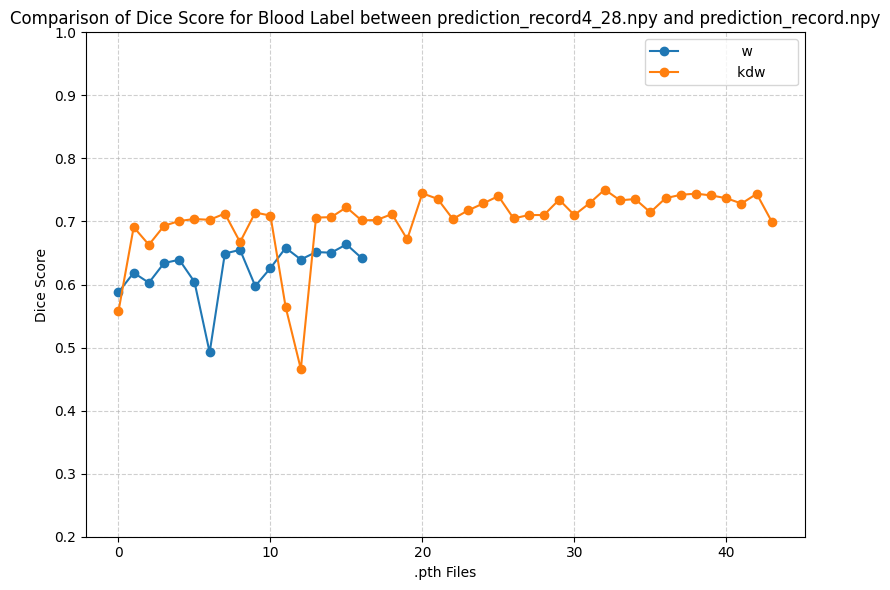

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# 指定两个.npy文件的路径
file1 = '/tmp/code/brain_seg/p00/dice/prediction_record_w.npy'
file2 = '/tmp/code/brain_seg/p00/dice/prediction_record_kdw.npy'

# 加载.npy文件
result_data1 = np.load(file1, allow_pickle=True)
result_data2 = np.load(file2, allow_pickle=True)

# 提取唯一的.pth文件名称
unique_checknames1 = np.unique(result_data1[:, 0])
unique_checknames2 = np.unique(result_data2[:, 0])

# 提取特定标签的数据
selected_label = "Blood"

# 从第一个文件中提取标签为 "muscle" 的数据
label_data1 = result_data1[result_data1[:, 1] == selected_label]
# 从第二个文件中提取标签为 "muscle" 的数据
label_data2 = result_data2[result_data2[:, 1] == selected_label]

# 创建图表以可视化两个文件中 "muscle" 标签的 Dice 分数对比
plt.figure(figsize=(8, 6))

# 统一两个文件的横轴
x1 = np.arange(0, len(label_data1))
x2 = np.arange(0, len(label_data2))

plt.plot(x1, label_data1[:, 2].astype(float), '-o', label='            w       ')
plt.plot(x2, label_data2[:, 2].astype(float), '-o', label='           kdw      ')


plt.ylim(0.2,1)
plt.xlabel('.pth Files')
plt.ylabel('Dice Score')
plt.title(f'Comparison of Dice Score for {selected_label} Label between prediction_record4_28.npy and prediction_record.npy')
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

plt.show()
